### Definition

Given two indepentent variables x and y, where x = f(t) and y = g(t), convolve them together. Thus we have the convolution of f(t) and g(t) over (or at) t. Aka, what is the sum of $ f(t) \cdot g(t) \; \forall \; t \!\in\! \mathbb{T} $


$
\begin{align*} \\
(f * g )(t)\ \ \, &=\ \int f(\tau)\, g(\upsilon)\, \partial t \; : t = \tau + \upsilon \\
\therefore \frac{\partial t}{\partial \tau} &= \frac{\partial t}{\partial \upsilon} = 1\\
\therefore (f * g )(t)\ \ \, &=\ \int f(\tau)\, g(t - \tau)\, \partial \tau \; \\
\end{align*} \\
$

$\frac{\partial t}{\partial \tau} = \frac{\partial t}{\partial \upsilon} = 1$ tells us that the relationship is symmmetric?

## But what is it? 
Its just a measure of similarity between some kernel and some signal?


### Motivation



### Analytic solutions

##### For a step, f(t), and a double sided ramp, g(t).

Equals the area between both functions as they pass through each other.
$
\begin{align*} \\
\int_{-\infty}^{-1} &= 0  \\
\int_{-1}^{0} &=  t^2/2 \\
\int_{o}^{1} &= t(1-t/2) \\
\end{align*} 
$

##### More complex - exponentials

$
\begin{align*} \\
f(t) &= t^3 u(t)\\
g(t) &=  t^2 u(t)\\
(f * g )(t)  &= \int^{\infty}_{-\infty} f(\tau)\, g(t - \tau) \partial \tau  \\
(f * g )(t) &= \int^{t}_{0} \tau^3 \cdot (t-\tau)^2 \partial \tau  \\
&= \int^{t}_{0} \tau^3 \cdot (t^2 - 2t\tau + \tau^2) \partial \tau  \\
&= \int^{t}_{0} \tau^3 t^2 - 2t\tau^4 + \tau^5 \partial \tau  \\
&= [\frac{\tau^4 t^2}{4} - \frac{2t\tau^5}{5} + \frac{\tau^6}{6} ]_{0}^{t}  \\
&= \frac{t^6}{4} - \frac{2t^6}{5} + \frac{t^6}{6}   \\
&= \frac{30t^6 - 48t^6+ 20t^6}{120}   \\
(f * g )(t) &= \frac{t^6}{60} : t \in [0:t]  \\
(f * g )(t) &= \frac{t^6}{60} u(t)  \\
\end{align*} 
$

Equals the area between both functions as they pass through each other.





##### In the frequency domain


Laplace transform ??


### Questions

What does a convolution mean in terms of probability and information? All the information is retained right?
What about a exponential convolution? Or an additive one? What else?

Is it possible to deconvolve a signal?
Is there such a thing as complex convolution?
What I am really getting at: are convolutions always 2 -> 1 mappings?




### Simple model

So for a step function and a ramp.






### Examples

What things can we convolve? 

* Shuffling a deck of cards??

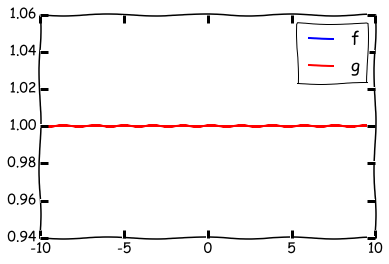

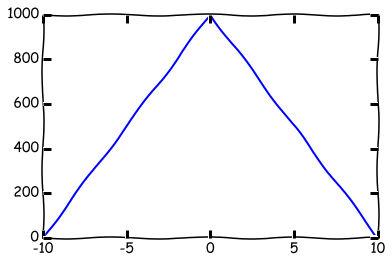

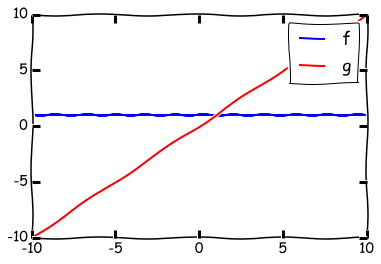

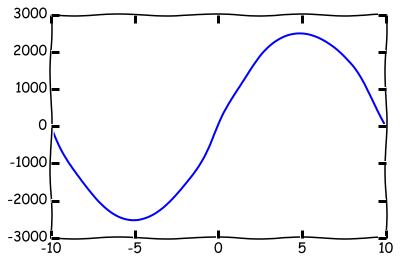

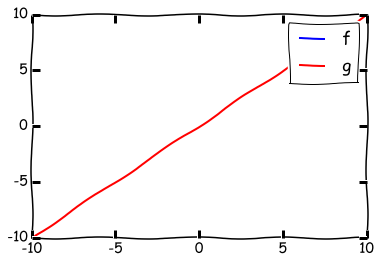

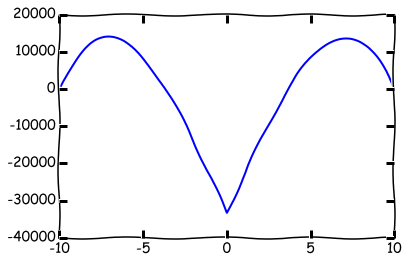

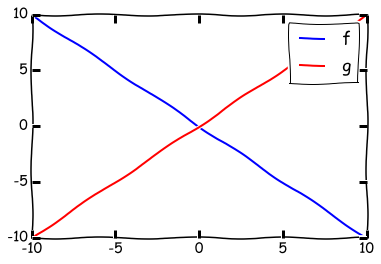

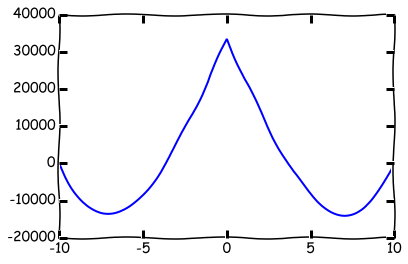

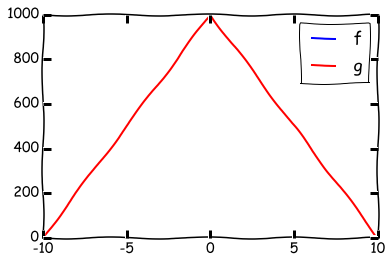

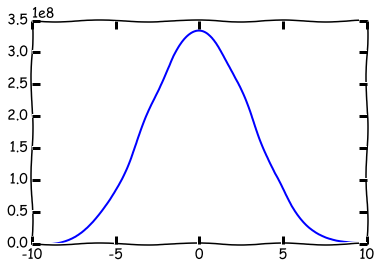

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.xkcd()

def conv_plot(f,g,x):
    plt.figure()
    plt.plot(x,f,label = 'f')
    plt.plot(x,g,label = 'g')
    plt.legend()
    
    c = np.convolve(f,g)
    xx = np.linspace(np.min(x), np.max(x), len(c))
    C = np.interp(x,xx,c)
    plt.figure()
    plt.plot(x,C)
    
    return C





def Ramp(x,g=1,c= 0): return x * g + c
def Step(x,c=1): return np.zeros(x.shape) + c

x = np.linspace(-10,10,1000)

StepStep = conv_plot(Step(x),Step(x),x)
A = conv_plot(Step(x),Ramp(x),x)
A = conv_plot(Ramp(x), Ramp(x),x)
A = conv_plot(Ramp(x,g=-1), Ramp(x),x)
A = conv_plot(StepStep,StepStep,x)

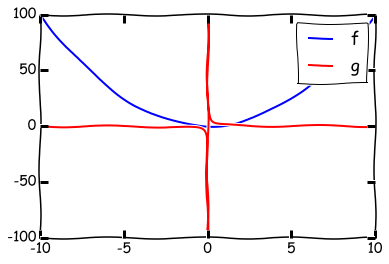

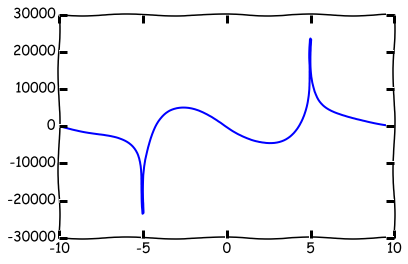

In [3]:
def F(x): return x**2
def G(x): return x**-1

x = np.linspace(-10,10,1000) 
FG = conv_plot(F(x),G(x),x)



### Waves (and wavelets?)


### Investigation



Max similarity value =  145169.804028


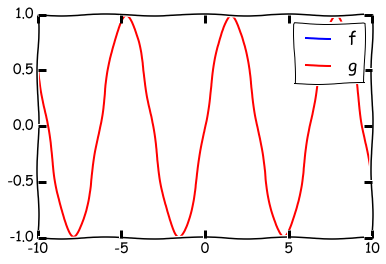

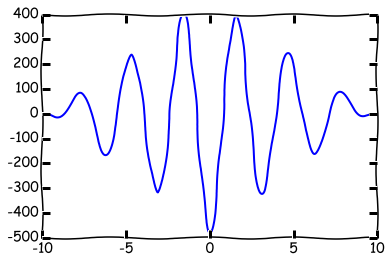

In [4]:
SinWavelet = conv_plot(np.sin(x),np.sin(x),x)
S1 = np.sum(np.abs(SinWavelet ))
print('Max similarity value = ',S1)

Well, what is more similar to something than itself? (is there a proof that this is unique?)

How much sine wave is there in a step function?  28.5594006049 %


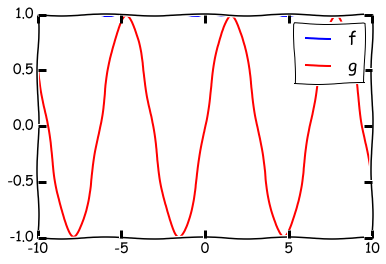

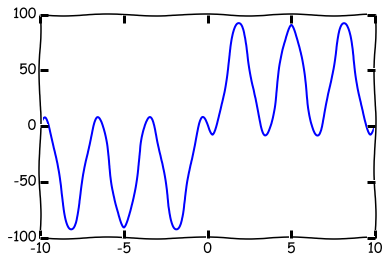

In [5]:
S2 = np.sum(np.abs(conv_plot(Step(x),np.sin(x),x)))
print('How much sine wave is there in a step function? ',100*S2/S1,'%')

How much sine wave is there in random noise?  2.12571426168 %


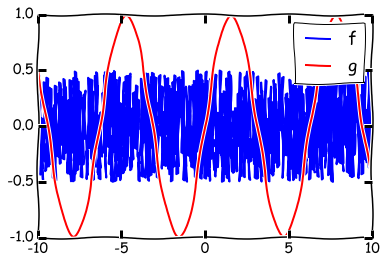

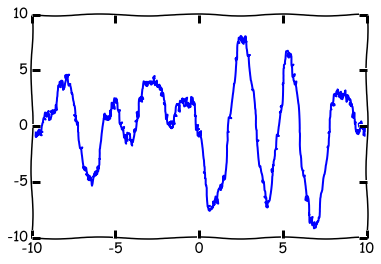

In [6]:
def chaotic(x): return np.random.random(x.shape) - 0.5
S3 = np.sum(np.abs(conv_plot(chaotic(x),np.sin(x),x)))
print('How much sine wave is there in random noise? ',100*S3/S1,'%')

How much sine wavelet is there in a ramp function?  6.48745483868 %


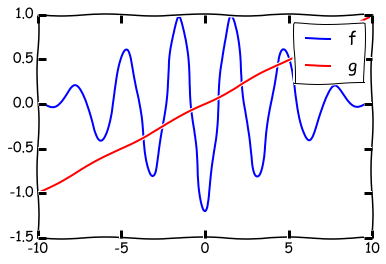

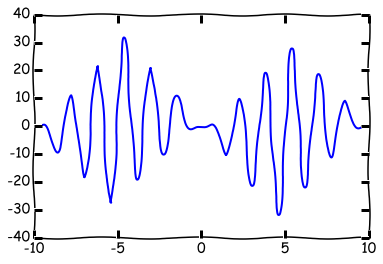

In [7]:
SinWavelet = SinWavelet/np.max(SinWavelet) #just need to normalise it
S4 = np.sum(np.abs(conv_plot(SinWavelet,Ramp(x,g=1/10),x)))
print('How much sine wavelet is there in a ramp function? ',100*S4/S1,'%')




### RNNs vs CNNs